# 1.21.2025 Group Homework Part 2
<b>Group 1: </b> <i> Safeer, Rohan, Kiley, Ivy, Lily, Ailelle, Leah </i>
#### Brief Explanation of Integrate and Fire Model: 
The integrate and fire model (I&F) is a mathematical representation used to illustrate and describe neuronal firing patterns elicited in response to stimuli. The I&F model is the most basic model when compared to the leaky integrate and fire model (LIF) and the Hodgkin-Huxley model (HH). Unlike the LIF and HH models, the I&F model does not appropriately take into account the presence of both leaky and voltage-gated ion channels that naturally occur in a biological neuron (non-linear processes). Additionally, in the I&F model, the membrane potential is modeled as rising linearly due to the input of current, until threshold is reached. Membrane potential does not reset until after it crosses threshold, regardless of the time that passes. When threshold is reached, an action potential occurs and is represented as a sharp spike, with the model showing an immediate reset back to below threshold. 

#### TL;DR/Markdown Practice
<ul>
<li style="background-color:powderblue;"><u><a href="https://neuronaldynamics.epfl.ch/online/Ch1.S3.html">Understanding Integrate and Fire Models</a></u></li>
<li>This model is the simplest model mathematically</li>
<li><u>Least accurate compared to HH and LIF</u></li>
<li><i>This model requires a spike generator</i></li>
</ul>

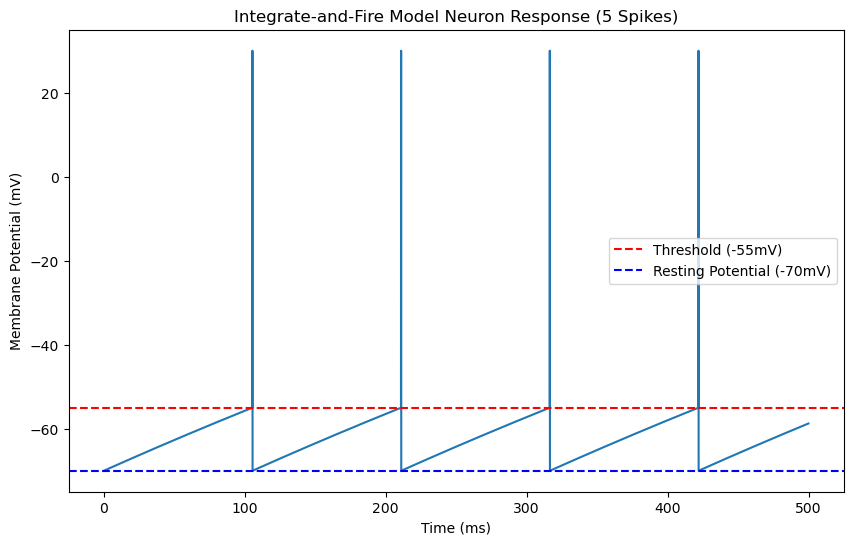

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_step = 0.1  # ms
total_time = 500  # ms
time = np.arange(0, total_time, time_step)
membrane_potential = np.full_like(time, -70.0)  # Start at resting potential (-70mV)
resting_potential = -70.0  # mV
threshold_potential = -55.0  # mV
reset_potential = -70.0  # mV (after spike)
spike_potential = 30.0  # mV (peak of action potential)
refractory_period = 5  # ms
refractory_time = int(refractory_period / time_step)
input_current = 15.0  # nA
membrane_resistance = 10.0  # MΩ
membrane_capacitance = 100.0  # pF
tau = membrane_resistance * membrane_capacitance  # Time constant

# Simulation
spike_count = 0
for t in range(1, len(time)):
    if spike_count >= 5:
        break

    if membrane_potential[t-1] == spike_potential:
        # Apply refractory period
        membrane_potential[t:t+refractory_time] = reset_potential
        continue

    dV = (resting_potential - membrane_potential[t-1] + (membrane_resistance * input_current)) / tau
    membrane_potential[t] = membrane_potential[t-1] + dV * time_step

    # Check for spike
    if membrane_potential[t] >= threshold_potential:
        membrane_potential[t] = spike_potential  # Depolarization (spike)
        spike_count += 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, membrane_potential)
plt.axhline(y=threshold_potential, color='red', linestyle='--', label='Threshold (-55mV)')
plt.axhline(y=resting_potential, color='blue', linestyle='--', label='Resting Potential (-70mV)')
plt.title('Integrate-and-Fire Model Neuron Response (5 Spikes)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()

## Here is some more information regarding the code: 

#### Discussion - Comparing and contrasting the integrate and fire neuron program to a biological neuron:
While the goal of the model is to simulate real, biological action potentials, there are some inconsistencies between the model and a real biological neuron. A biological neuron has leaky channels, meaning the rise from rest to threshold would be curved rather than linear (which the IF model depicts) as the potentials decay over time as charges leak through the leaky channels. Therefore an accurate model would have non-linear graded potentials. Further, rather than going straight to rest after peaking during an action potential, the membrane potential of an accurate neuron would briefly hyperpolarize before returning to rest due to the effects of the potassium channels that open after the peak. This phenomena is responsible for the relative refractory period where the neuron could fire, but it is incredibly unlikely. This is simply absent from the integrate and fire model. Lastly, biological neurons experience noise, which is uncoordinated synaptic activity, which would be depicted via slight fluctuations around the resting potential. 

However, the model does, like a biological neuron, have a graded potential buildup prior to firing, a discrete action potential, and a resting period. Further, the voltage values such as rest (-70 mV), threshold (55 mV), and peak potential of the computer model were established similar to that of an average biological neuron. Ultimately, the model shows the general integrate-and-fire pattern of a biological neuron (graded potentials rising from rest to threshold, and then produce a large, discrete spike before returning to rest) but lack the fine details such as non-linear rising from rest to threshold due to leaky channels, hyperpolarization before returning to rest that makes up the relative refractory period, and the noise that biological neurons have from their natural signal rich environment. 
#### Reflection
##### Most Challenging Part of This Assignment
The most challenging part of this homework was getting ChatGPT to give a good enough piece of code. The first two iterations of the model would not go beyond the threshold to fire an action potential. However, by telling the model to write the code so it fires five potentials, the problem was fixed. 

##### Estimated Time for Assignment Completion
The project took about 30 minutes per person, so around 3.5 hours for total work time.